In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf
from datetime import datetime

In [4]:
ltc = yf.download("LTC-CAD")

[*********************100%***********************]  1 of 1 completed


In [5]:
ltc

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17    5.580747    5.662510    5.467511    5.568958    5.568958   
2014-09-18    5.576532    5.573999    5.013224    5.126110    5.126110   
2014-09-19    5.128364    5.209049    4.659790    4.743669    4.743669   
2014-09-20    4.745236    5.059685    4.606020    4.698367    4.698367   
2014-09-21    4.672751    4.713372    4.554285    4.647160    4.647160   
...                ...         ...         ...         ...         ...   
2022-03-13  134.859970  136.631058  129.734909  130.053711  130.053711   
2022-03-14  130.049149  135.638275  129.293381  135.493073  135.493073   
2022-03-15  135.483078  138.419556  132.127914  136.638306  136.638306   
2022-03-16  136.622894  141.300201  135.108292  141.292328  141.292328   
2022-03-17  141.361328  141.315094  137.947342  140.621994  140.621994   

                Volume  
Date                    
2014-09-17     3381789  
2014-09-18     4999227  
2014-09-19     4293917  
2014-09-20     6018312  
2014-09-21     3208220  
...                ...  
2022-03-13   681392269  
2022-03-14   952675618  
2022-03-15   911456557  
2022-03-16  1240221934  
2022-03-17   998165376  

[2739 rows x 6 columns]

In [6]:
ltc = ltc.drop(columns=['Open','High','Low','Close','Volume'])

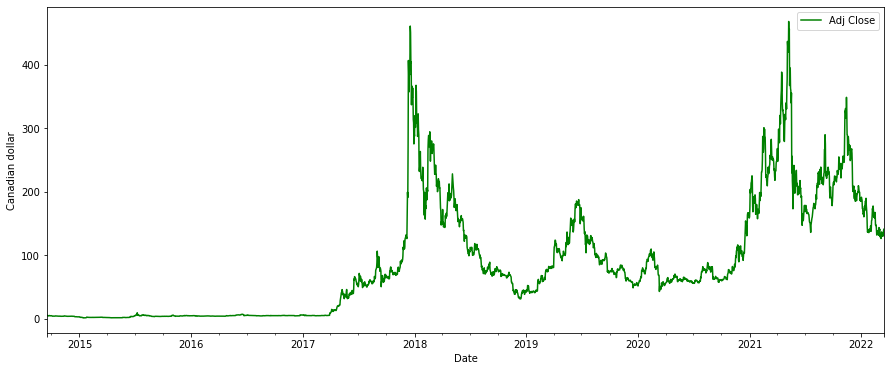

In [7]:
ltc.plot(figsize=(15, 6),color='green',ylabel='Canadian dollar')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


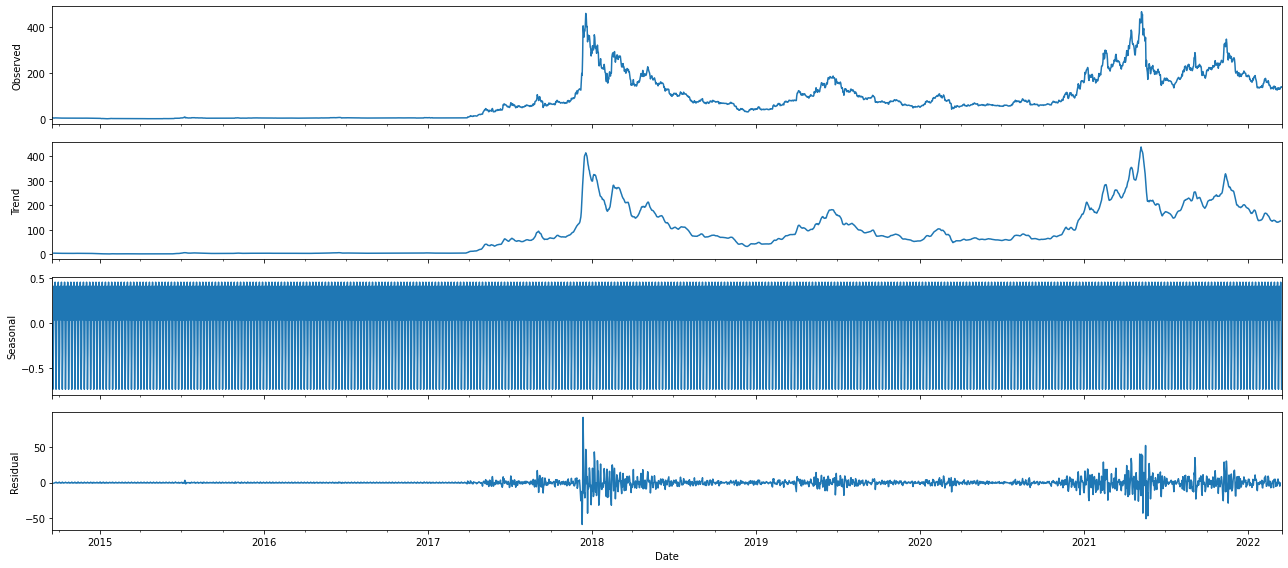

In [8]:
ltc.sort_index(inplace=True)
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ltc, model='additive')
fig = decomposition.plot()

In [9]:
#Finding best arima model. 
#lowest AIC values means best fit model.
import warnings
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            modelhigh = sm.tsa.statespace.SARIMAX(ltc['Adj Close'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            resultshigh = modelhigh.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, resultshigh.aic))
        except:
            continue

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:34128.861697484936
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:31200.77085274558
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:26527.765305377616


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:26370.980391961406


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:26500.704971533924


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:26451.60474951652


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:26378.47475795682


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:26369.009380819763


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:30592.597979676542
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:28035.97691179064


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:24175.18215621093


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:23925.49195168962


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:24142.04977311266


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:23997.52847144921


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:23951.703157627315


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:23917.8903780528
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:19483.750185476172


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:19392.692018630132
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:21513.409111529756


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:19390.357300056035
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:19399.859845652732


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:19382.246011709503


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:20545.3960637489


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:19380.73077790548
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:19479.4071551416


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:19388.299981400225


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:21508.512593403462


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:19386.025472038724


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:19401.557196937138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:19377.872206314467


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:20544.596098985126


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:19375.67448303031
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:19489.225672015826


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:19433.779026627755
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:21411.541153643906


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:19392.436602052836


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:19399.698837171632


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:19389.64619159133


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:20477.610966945052


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:19383.559795682933
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:19484.938246873862


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:19434.323692807906
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:21402.897953917403


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:19388.18690244768


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:19401.451796327052


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:19385.309469208427


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:20479.491109909097


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:19378.654886658536
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:19485.523546115386


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:19394.41444862683
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:21515.407329921134


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:19392.23129778767


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:19395.439919469132


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:19384.038388230132


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:20537.938449054054


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:19382.464470030733


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:19478.021227248682


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:19386.65137930404


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:21506.261370818975


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:19388.152747092317


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:19394.249599195224


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:19375.368321604285


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:20536.133181925863


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:19377.762516927272


In [10]:
modelhigh = sm.tsa.statespace.SARIMAX(ltc['Adj Close'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultshigh = modelhigh.fit()
print(resultshigh.summary().tables[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0099      0.006     -1.659      0.097      -0.022       0.002
ar.S.L12      -0.0836      0.010     -8.738      0.000      -0.102      -0.065
ma.S.L12      -1.0000      7.793     -0.128      0.898     -16.273      14.273
sigma2        72.2585    563.144      0.128      0.898   -1031.484    1176.001


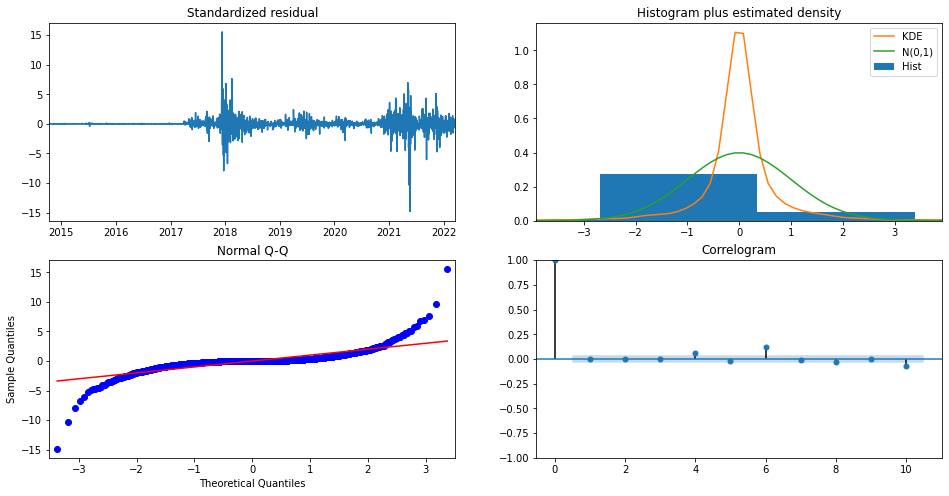

In [11]:
resultshigh.plot_diagnostics(figsize=(16, 8))
plt.show()

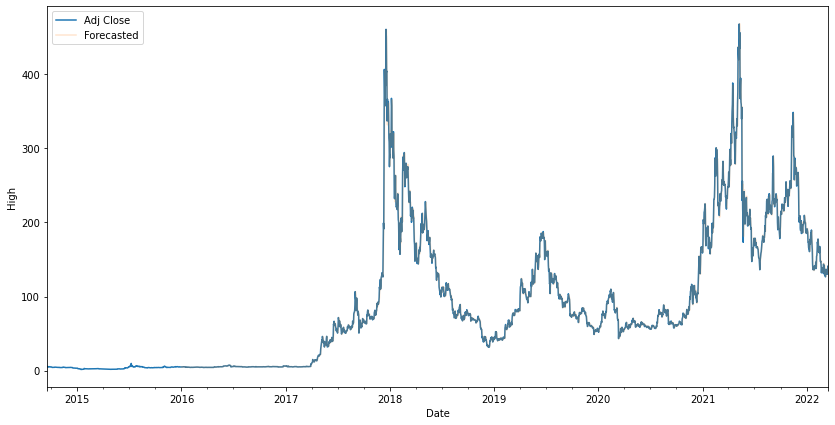

In [13]:
pred = resultshigh.get_prediction(start=datetime(2016,1,1), dynamic=False)
pred_ci = pred.conf_int()
ax = ltc['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.2, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('High')
plt.legend()
plt.show()

2022-03-18    141.14
2022-03-19    140.45
2022-03-20    140.59
2022-03-21    140.33
2022-03-22    140.79
2022-03-23    140.44
2022-03-24    140.57
Freq: D, dtype: float64


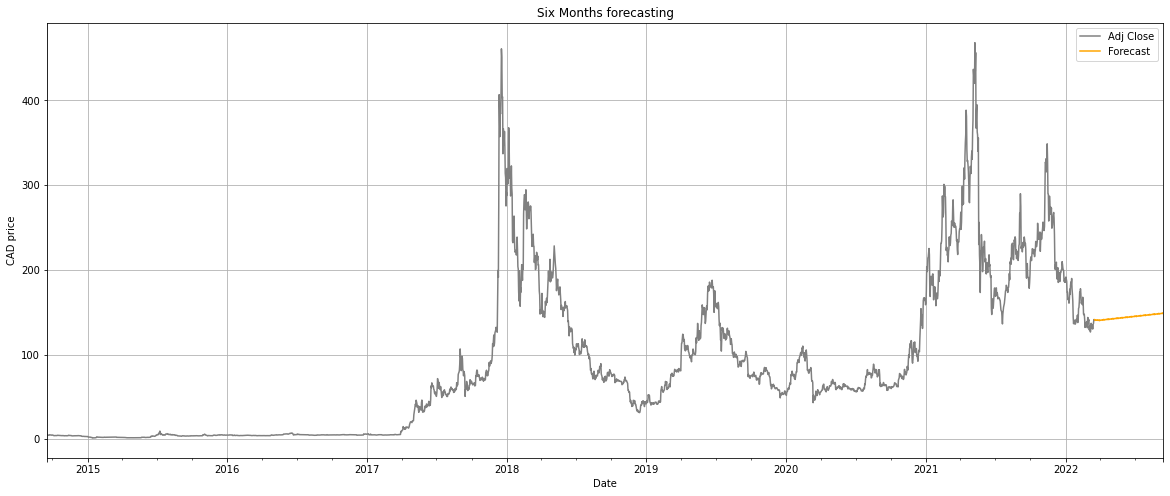

In [45]:
pred_uc = resultshigh.get_forecast(steps=180)
pred_ci = pred_uc.conf_int()
ax = ltc.plot(label='observed',color='Grey', figsize=(20, 8))
One_week_values = pred_uc.predicted_mean[:7]
One_week_values = round(One_week_values,2)
print(One_week_values)
pred_uc.predicted_mean.plot(ax=ax, color='Orange',label='Forecast')
ax.set_xlabel('Date')
ax.set_title("Six Months forecasting")
ax.set_ylabel('CAD price')
plt.legend()
plt.grid()



plt.show()

In [47]:
import plotly.express as px
import plotly.graph_objs as go
#fig = px.line(x=pred_uc.predicted_mean.index, y=pred_uc.predicted_mean.values, labels={'x':'Date', 'y':'Canadin Dollars'},title="Six Month Litecoin forecasting",markers=True)
fig.add_trace(go.Candlestick(x=pred_uc.predicted_mean.index,
                close =pred_uc.predicted_mean.values, name= "market value"))
#fig.add_trace(go.Scatter(x=pred_uc.predicted_mean.index, y=pred_uc.predicted_mean.values,name = 'Long Term MA'))
fig.update_xaxes(#rangeslider_visible=True,
                 rangeselector=dict(
                      buttons=list([
                          dict(count=11, label="1mo", step="day", stepmode="backward"),
                          dict(count=5, label="5d", step="day", stepmode="backward"),
                          dict(count=7, label="WTD", step="day", stepmode="todate"),
                          dict(step="all")
        ])
    ))
fig.show()

In [22]:
import plotly.express as px
fig = px.line(x=One_week_values.index, y=One_week_values.values, labels={'x':'Date', 'y':'Canadin Dollars'},title="One Week Bitcoin forecasting",markers=True)
fig.update_xaxes(rangeslider_visible=True,)
fig.show()

In [19]:
import plotly.graph_objs as go
data = yf.download(tickers='LTC-CAD',period = '8d', interval = '90m')
 
#Adding Moving average calculated field
data['MA5'] = data['Close'].rolling(5).mean()
data['MA20'] = data['Close'].rolling(20).mean()
 
#declare figure
fig = go.Figure()
 
#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))
 
#Add Moving average on the graph
fig.add_trace(go.Scatter(x=data.index, y= data['MA20'],line=dict(color='blue', width=1.5), name = 'Long Term MA'))
fig.add_trace(go.Scatter(x=data.index, y= data['MA5'],line=dict(color='orange', width=1.5), name = 'Short Term MA'))
 
#Updating X axis and graph
# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=3, label="3d", step="day", stepmode="backward"),
            dict(count=5, label="5d", step="day", stepmode="backward"),
            dict(count=7, label="WTD", step="day", stepmode="todate"),
            dict(step="all")
        ])
    )
)
 
#Show
fig.show()

[*********************100%***********************]  1 of 1 completed
